In [65]:
import pandas as pd

In [66]:
df = pd.read_csv(r"C:\Users\10725950\Downloads\XYZ_sales_data (1).csv")


In [67]:
r={}
r['date'] = df['Date']
r['quantity'] = df['Order_Quantity']
r=pd.DataFrame(r)
r['date']=pd.to_datetime(r['date'])
data=r.groupby(['date'],sort=True).sum()
data



C:\Users\10725950\AppData\Local\Temp\ipykernel_20360\2626000266.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  r['date']=pd.to_datetime(r['date'])


,quantity
date,
2011-01-01,8
2011-01-02,9
2011-01-03,17
2011-01-04,10
2011-01-05,5
...,...
2016-07-27,807
2016-07-28,1332
2016-07-29,895


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [69]:
scaler = MinMaxScaler()
data['quantity'] = scaler.fit_transform(data['quantity'].values.reshape(-1,1))
data 
data.to_csv('mydata.csv')

In [70]:
train_size = int(len(data)*0.7)
train_data,test_data = data[:train_size],data[train_size:]

In [71]:
def create_sequences(data,sequence_length):
    sequences,labels = [],[]
    for i in range(len(data)-sequence_length):
        sequence = data.iloc[i:i+sequence_length]['quantity']
        target = data.iloc[i+sequence_length]['quantity']
        sequences.append(sequence)
        labels.append(target)
        print("Sequences:{}".format(sequence))
        print("Target:{}".format(target))
    return np.array(sequences), np.array(labels)

In [72]:
sequence_length = 7
X_train,y_train = create_sequences(train_data,sequence_length)
X_test,y_test = create_sequences(test_data,sequence_length)

Sequences:date
2011-01-01    0.001898
2011-01-02    0.002169
2011-01-03    0.004338
2011-01-04    0.002440
2011-01-05    0.001085
2011-01-06    0.002711
2011-01-07    0.001085
Name: quantity, dtype: float64
Target:0.004609544468546637
Sequences:date
2011-01-02    0.002169
2011-01-03    0.004338
2011-01-04    0.002440
2011-01-05    0.001085
2011-01-06    0.002711
2011-01-07    0.001085
2011-01-08    0.004610
Name: quantity, dtype: float64
Target:0.0021691973969631237
Sequences:date
2011-01-03    0.004338
2011-01-04    0.002440
2011-01-05    0.001085
2011-01-06    0.002711
2011-01-07    0.001085
2011-01-08    0.004610
2011-01-09    0.002169
Name: quantity, dtype: float64
Target:0.0021691973969631237
Sequences:date
2011-01-04    0.002440
2011-01-05    0.001085
2011-01-06    0.002711
2011-01-07    0.001085
2011-01-08    0.004610
2011-01-09    0.002169
2011-01-10    0.002169
Name: quantity, dtype: float64
Target:0.004067245119305857
Sequences:date
2011-01-05    0.001085
2011-01-06    0.0027

In [73]:
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [74]:
model.fit(X_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
14/14 [==============================] - 3s 12ms/step - loss: 0.0498
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0180
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 9/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 10/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 11/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 12/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 13/100
14/14 [======

In [75]:
predicted_sales = model.predict(X_test)
X_test.astype(int)


18/18 [==============================] - 0s 4ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
predicted_sales = scaler.inverse_transform(predicted_sales)
actual_sales = scaler.inverse_transform(test_data['quantity'][sequence_length:].to_numpy().reshape(-1,1))

In [77]:
predicted_sales

array([[  40.515438],
       [  38.52702 ],
       [  37.32371 ],
       [  36.593662],
       [  36.245075],
       [  38.56812 ],
       [  38.534267],
       [  36.493515],
       [  38.497364],
       [  36.471375],
       [  35.15929 ],
       [  36.042873],
       [  35.32837 ],
       [  35.265583],
       [  35.855076],
       [  36.66463 ],
       [  36.979836],
       [  40.53666 ],
       [  39.35135 ],
       [  41.813267],
       [  41.522923],
       [  41.77548 ],
       [  41.743214],
       [  39.718983],
       [  36.791866],
       [  37.920597],
       [  37.6905  ],
       [  37.77277 ],
       [  38.52009 ],
       [  37.23294 ],
       [  38.784637],
       [  40.75911 ],
       [  40.867725],
       [  41.111706],
       [  42.054688],
       [  43.129505],
       [  40.994987],
       [  41.309235],
       [  41.55044 ],
       [  40.03863 ],
       [  37.449356],
       [  36.41819 ],
       [  37.115135],
       [  38.52189 ],
       [  38.557903],
       [  

In [78]:
actual_sales

array([[   6.],
       [   9.],
       [   9.],
       [  12.],
       [  22.],
       [  13.],
       [   4.],
       [  18.],
       [   4.],
       [   5.],
       [  14.],
       [  10.],
       [  10.],
       [  11.],
       [  15.],
       [  11.],
       [  25.],
       [  10.],
       [  23.],
       [  14.],
       [  16.],
       [  16.],
       [   7.],
       [   4.],
       [  16.],
       [  14.],
       [  13.],
       [  16.],
       [   8.],
       [  17.],
       [  20.],
       [  16.],
       [  16.],
       [  19.],
       [  21.],
       [   7.],
       [  17.],
       [  18.],
       [  10.],
       [   4.],
       [   9.],
       [  16.],
       [  17.],
       [  14.],
       [  11.],
       [  21.],
       [  10.],
       [  13.],
       [  25.],
       [   7.],
       [   8.],
       [  14.],
       [  27.],
       [   8.],
       [  11.],
       [   6.],
       [  10.],
       [  11.],
       [  24.],
       [  20.],
       [  13.],
       [   8.],
       [

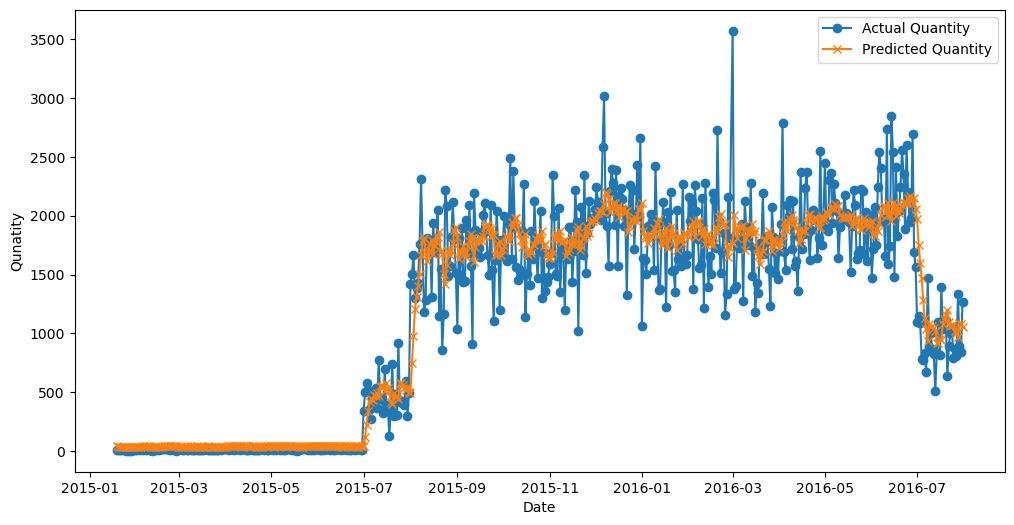

In [79]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index[sequence_length:],actual_sales,label = 'Actual Quantity',marker = 'o')
plt.plot(test_data.index[sequence_length:],predicted_sales,label = 'Predicted Quantity',marker = 'x')
plt.xlabel('Date')
plt.ylabel('Qunatity')
plt.legend()
plt.show()

In [80]:
from datetime import datetime

In [89]:
date = '2016-07-30'
data4 =datetime.strptime(date,'%Y-%m-%d')

In [93]:
datam = pd.read_csv('mydata.csv')
datam['date']


0       2011-01-01
1       2011-01-02
2       2011-01-03
3       2011-01-04
4       2011-01-05
           ...    
1879    2016-07-27
1880    2016-07-28
1881    2016-07-29
1882    2016-07-30
1883    2016-07-31
Name: date, Length: 1884, dtype: object